В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. 


In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = fetch_california_housing(as_frame=True)
features = data.data
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
target = data.target
target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


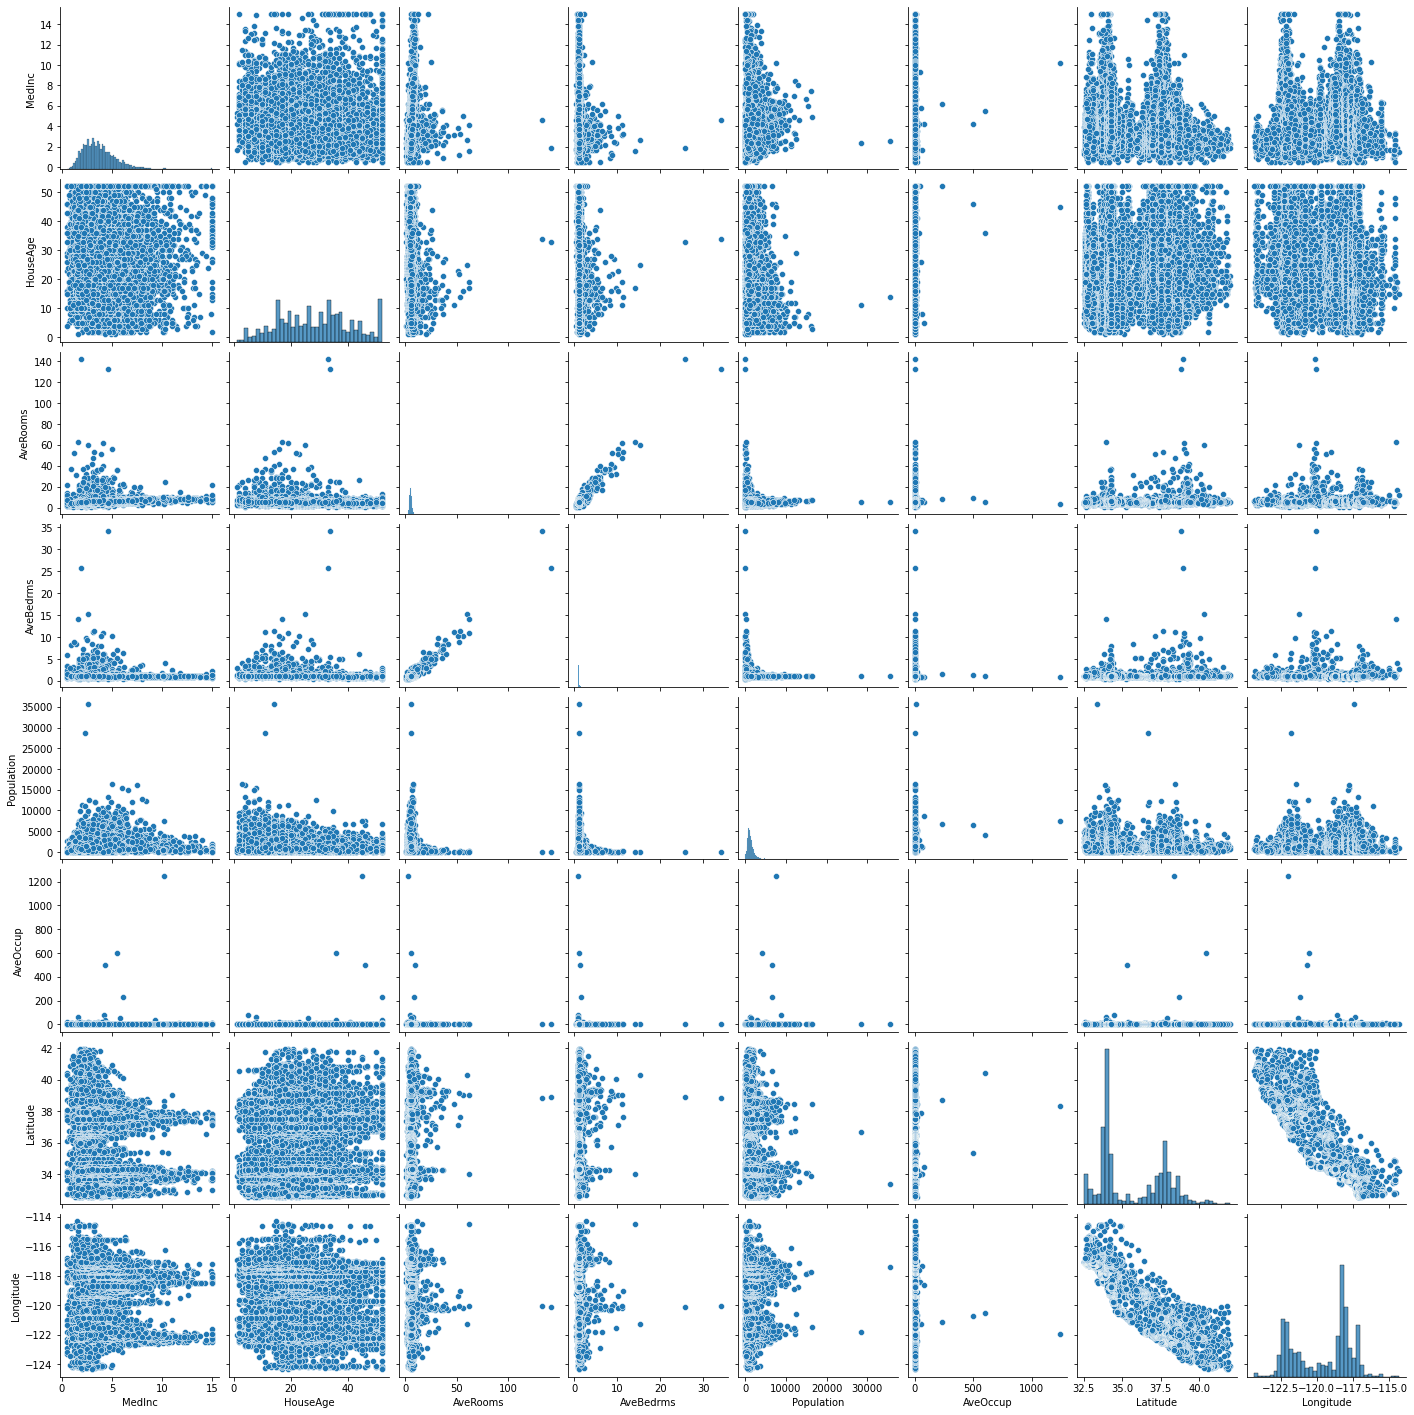

In [ ]:
sns.pairplot(features)

In [ ]:
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
features['AveOccup'] = features['AveOccup'] ** 2
features.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,6.530864,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,4.451433,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,7.852660,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,6.492025,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,4.758799,37.85,-122.25


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Score: {lr.score(X_test, y_test)}')

Score: 0.5901772522506578


In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
print(f'Score: {dtr.score(X_test, y_test)}')

Score: 0.5937835487447702


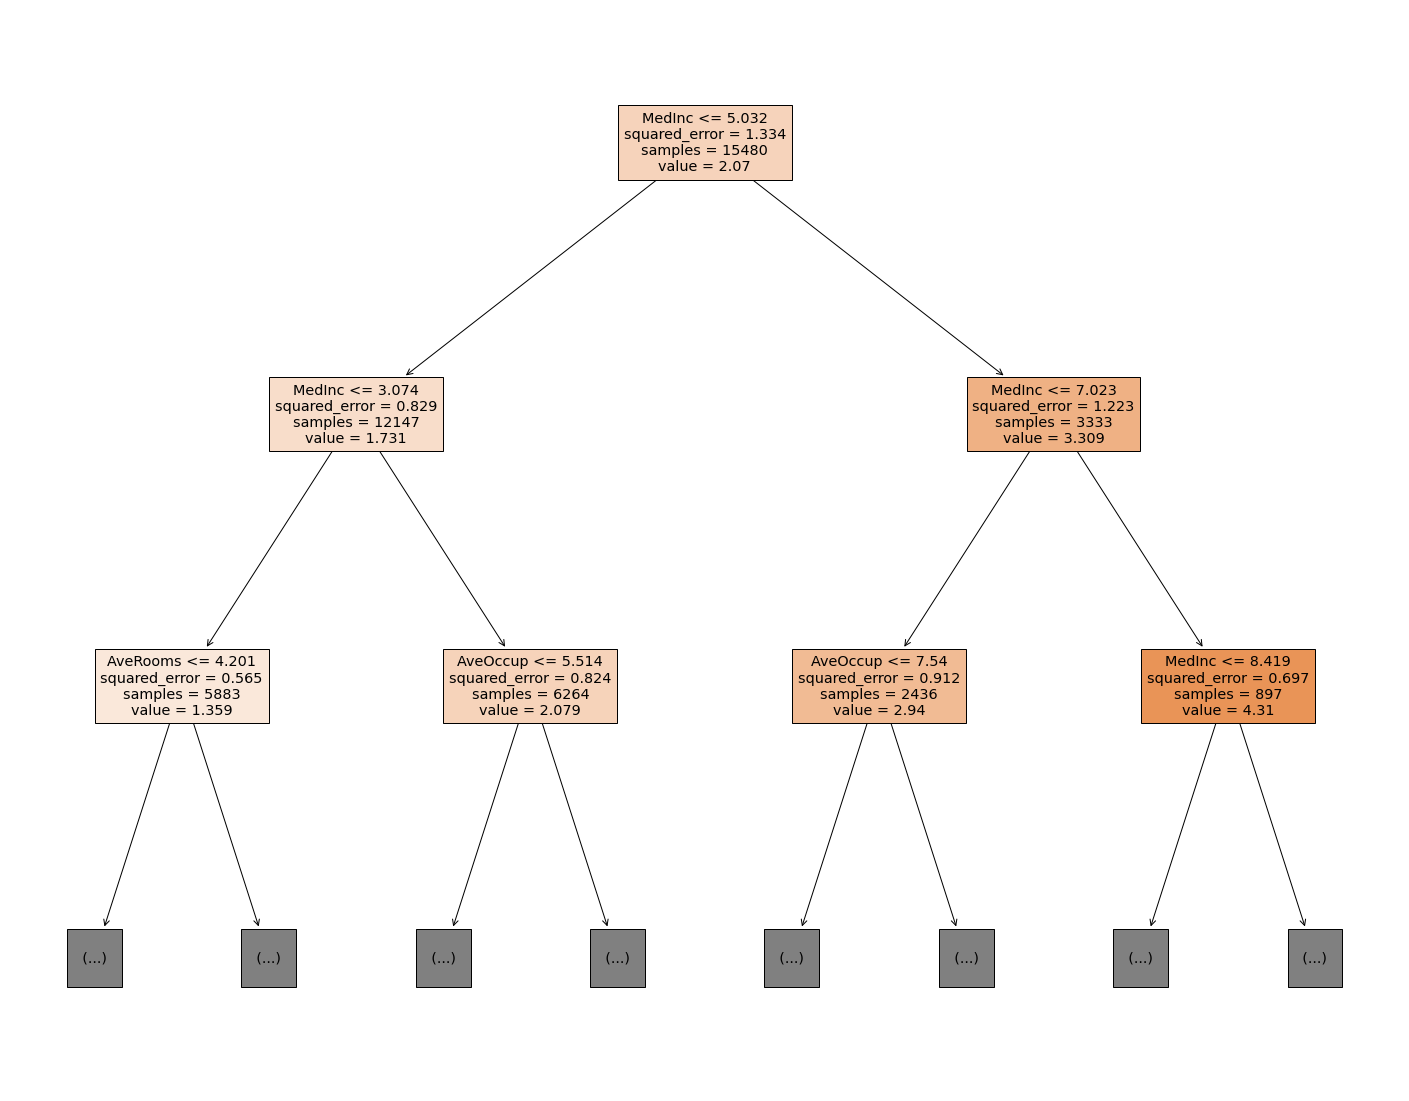

In [ ]:
plt.figure(figsize=(25,20))
_ = plot_tree(dtr, feature_names=features.columns, max_depth=2, filled=True)

In [ ]:
dtr = DecisionTreeRegressor(max_depth=10)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
print(f'Score: {dtr.score(X_test, y_test)}')

Score: 0.6874929428427294


In [ ]:
dtr = DecisionTreeRegressor(max_depth=10, min_samples_leaf=70)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
print(f'Score: {dtr.score(X_test, y_test)}')

Score: 0.688901613288242


Точность дерева решений с подобранными гиперпараметрами выше чем у линейной регрессии, но без дополнительных параметров линейная регрессия предсказывает неприрывную величину на уровне с деревом.